In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

dataset = pd.read_csv('dataset.csv')
severity = pd.read_csv('Symptom-severity.csv')
description = pd.read_csv('symptom_Description.csv')
precaution = pd.read_csv('symptom_precaution.csv')

print(dataset.shape)
print(dataset.head())
print(dataset.info())

print(severity.head())
print(description.head())
print(precaution.head())


(4920, 18)
            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symp

**Analiza datasetului principal (dataset.csv)**

Numar de boli unice: 41
Numar de simptome unice: 132


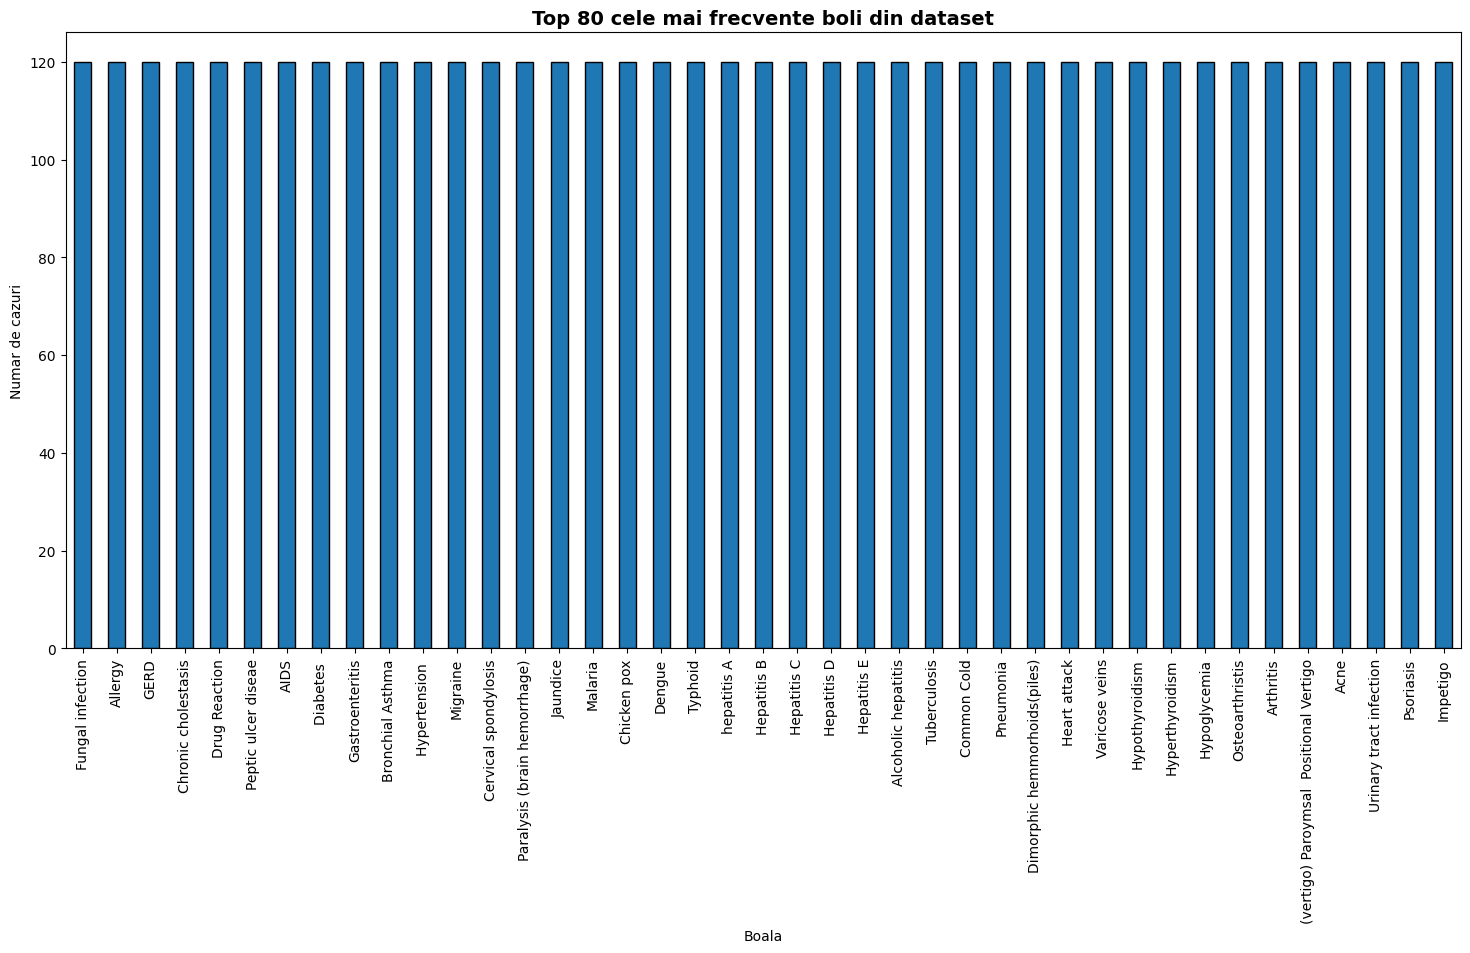

In [73]:
#bolile si simptomele unice
print(f"Numar de boli unice: {dataset['Disease'].nunique()}")
print(f"Numar de simptome unice: {pd.unique(dataset.iloc[:, 1:].values.ravel('K')).shape[0]}")

plt.figure(figsize=(18,8))
dataset['Disease'].value_counts().head(80).plot(kind='bar', color='#1f77b4', edgecolor='black')
plt.title("Top 80 cele mai frecvente boli din dataset", fontsize=14, fontweight='bold')
plt.xlabel("Boala")
plt.ylabel("Numar de cazuri")
plt.xticks(rotation=90)
plt.show()


**Analiza severitatii simptomelor**

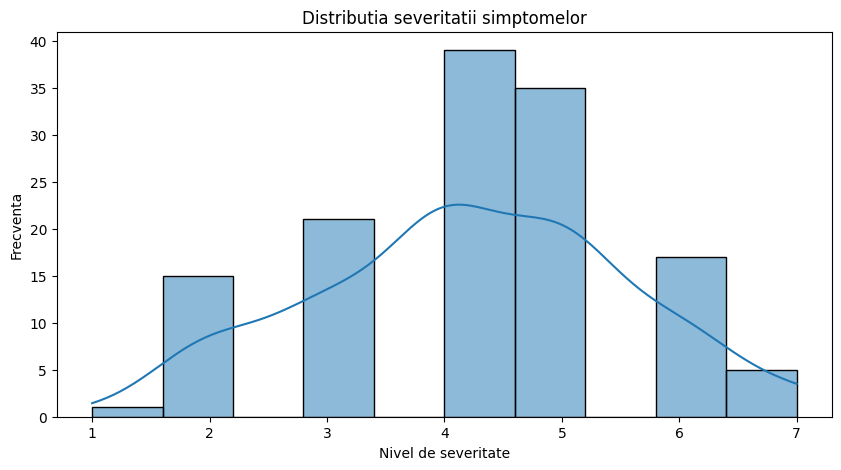

           weight
count  133.000000
mean     4.225564
std      1.323543
min      1.000000
25%      3.000000
50%      4.000000
75%      5.000000
max      7.000000


In [74]:
plt.figure(figsize=(10,5))
sns.histplot(severity['weight'], bins=10, kde=True)
plt.title("Distributia severitatii simptomelor")
plt.xlabel("Nivel de severitate")
plt.ylabel("Frecventa")
plt.show()

print(severity.describe())



In [75]:
pd.set_option('display.max_colwidth', None)

for i, row in description.sample(20).iterrows():
    print(f"Boala: {row['Disease']}")
    print(f"Descriere: {row['Description']}")
    print("-"*80)

Boala: Peptic ulcer diseae
Descriere: Peptic ulcer disease (PUD) is a break in the inner lining of the stomach, the first part of the small intestine, or sometimes the lower esophagus. An ulcer in the stomach is called a gastric ulcer, while one in the first part of the intestines is a duodenal ulcer.
--------------------------------------------------------------------------------
Boala: Dengue
Descriere: an acute infectious disease caused by a flavivirus (species Dengue virus of the genus Flavivirus), transmitted by aedes mosquitoes, and characterized by headache, severe joint pain, and a rash. — called also breakbone fever, dengue fever.
--------------------------------------------------------------------------------
Boala: Acne
Descriere: Acne vulgaris is the formation of comedones, papules, pustules, nodules, and/or cysts as a result of obstruction and inflammation of pilosebaceous units (hair follicles and their accompanying sebaceous gland). Acne develops on the face and upper tr

**Corelatii intre simptome si boli**

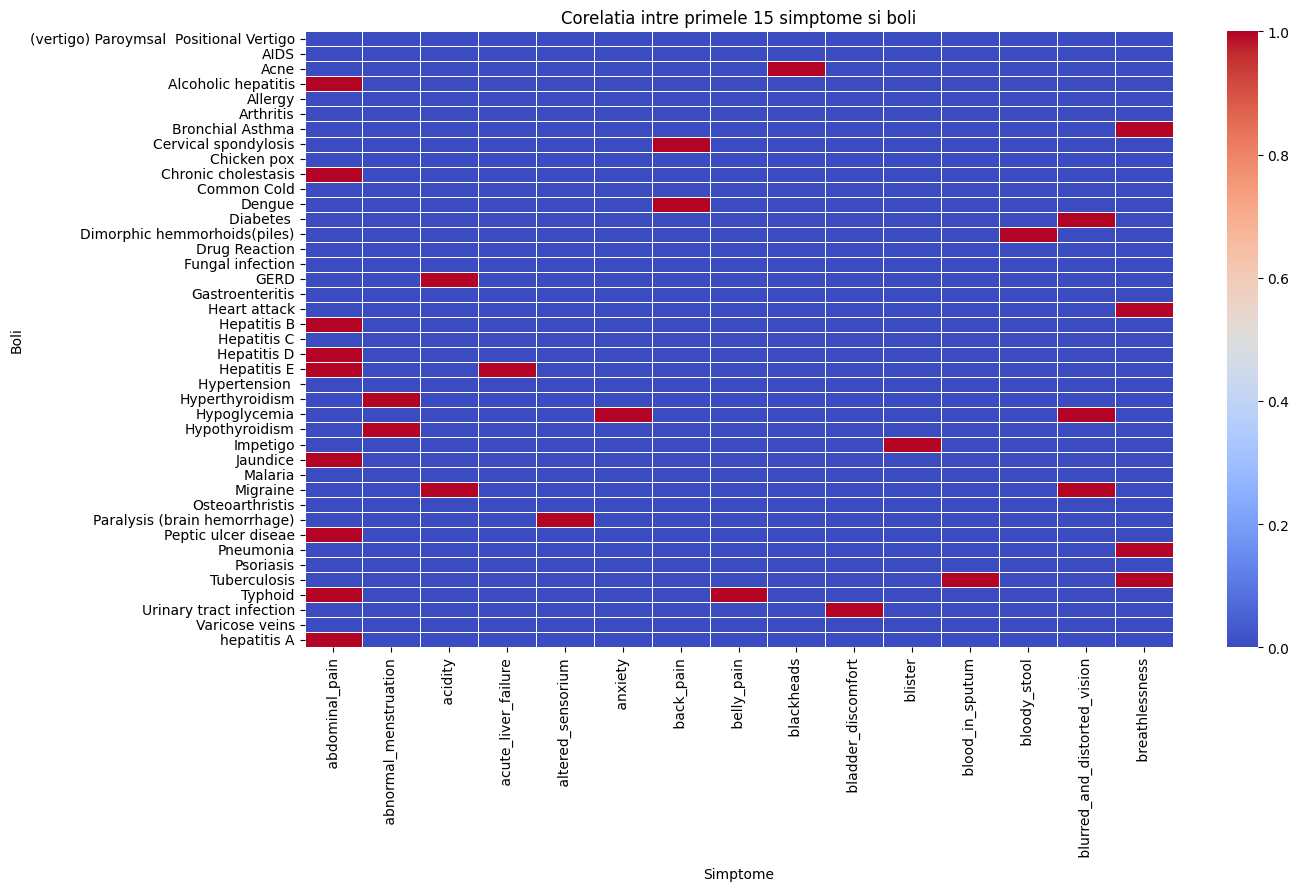

In [76]:
dataset_clean = dataset.fillna('')
symptom_cols = dataset_clean.columns[1:]

dataset_clean['Symptom_List'] = dataset_clean[symptom_cols].values.tolist()
dataset_clean['Symptom_List'] = dataset_clean['Symptom_List'].apply(lambda x: [s for s in x if s != ''])

mlb = MultiLabelBinarizer()
symptom_encoded = mlb.fit_transform(dataset_clean['Symptom_List'])

symptom_df = pd.DataFrame(symptom_encoded, columns=mlb.classes_)
symptom_df['Disease'] = dataset_clean['Disease']

disease_symptom_matrix = symptom_df.groupby('Disease').max()

plt.figure(figsize=(14,8))
sns.heatmap(disease_symptom_matrix.iloc[:, :15], cmap='coolwarm', linewidths=0.5)
plt.title("Corelatia intre primele 15 simptome si boli")
plt.xlabel("Simptome")
plt.ylabel("Boli")
plt.show()


In [77]:
dataset['num_symptoms'] = dataset.iloc[:, 1:].notna().sum(axis=1)

summary = dataset.groupby('Disease').agg(
    num_cazuri=('Disease', 'count'),
    medie_simptome=('num_symptoms', 'mean')
).sort_values(by='num_cazuri', ascending=False)

total_cazuri = summary['num_cazuri'].sum()
summary['procent_total'] = (summary['num_cazuri'] / total_cazuri * 100).round(2)

summary = summary.reset_index()

print("Tabel sumar - Cele mai frecvente boli:\n")
print(summary.head(120))


Tabel sumar - Cele mai frecvente boli:

                                    Disease  num_cazuri  medie_simptome  \
0   (vertigo) Paroymsal  Positional Vertigo         120            5.65   
1                                      AIDS         120            3.65   
2                                      Acne         120            3.65   
3                       Alcoholic hepatitis         120            6.65   
4                                   Allergy         120            3.60   
5                                 Arthritis         120            4.75   
6                          Bronchial Asthma         120            5.60   
7                      Cervical spondylosis         120            4.65   
8                               Chicken pox         120           10.55   
9                       Chronic cholestasis         120            6.65   
10                              Common Cold         120           16.60   
11                                   Dengue         120     